Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Accuracy: 0.956140350877193


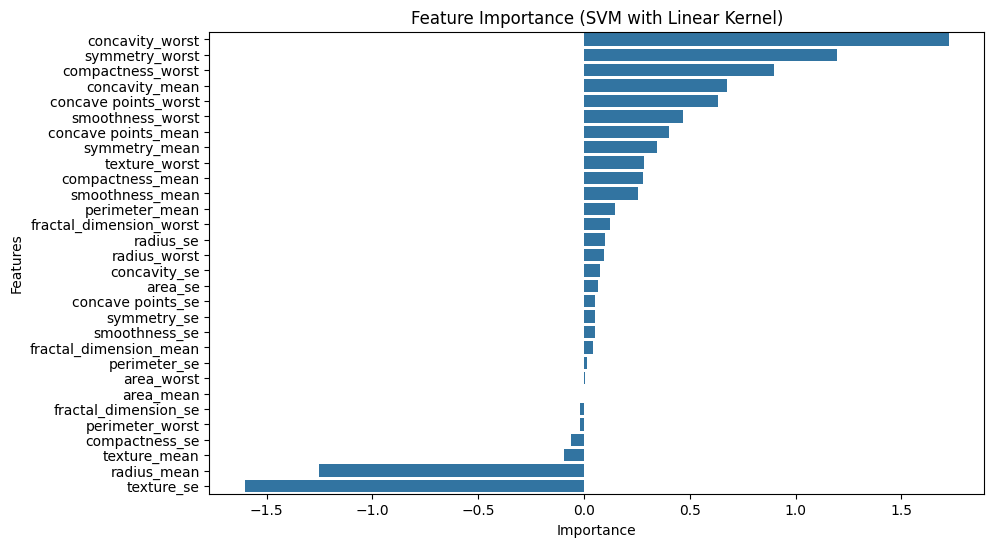

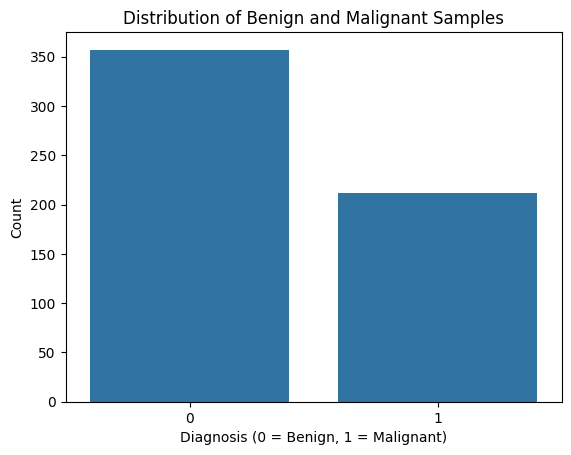

The sample is benign.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Load the dataset
df = pd.read_csv("/content/data.csv")

# Step 2: Clean the data
# Drop the 'Unnamed: 32' column as it is irrelevant
df = df.drop(columns=['Unnamed: 32'])

# Step 3: Convert diagnosis to numerical values (benign = 0, malignant = 1)
label_encoder = LabelEncoder()
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])

# Step 4: Split the dataset into features and labels
X = df.drop(columns=['id', 'diagnosis'])
y = df['diagnosis']

# Step 5: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train a Support Vector Machine (SVM) model
model = SVC(kernel='linear', random_state=42)  # Using linear kernel (you can try 'rbf' kernel for better performance)
model.fit(X_train, y_train)

# Step 7: Predict on the test set
y_pred = model.predict(X_test)

# Step 8: Evaluate the model's performance
print("Classification Report:")
print(classification_report(y_test, y_pred))

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# Step 9: Optional - Visualize feature importance (for SVM, this is not as direct as Random Forest)
# We can look at the coefficients of the linear kernel for feature importance
if model.kernel == 'linear':
    coefficients = model.coef_.flatten()
    feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': coefficients})
    feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10,6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance)
    plt.title('Feature Importance (SVM with Linear Kernel)')
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.show()

# Step 10: Optional - Visualize the distribution of 'diagnosis' (benign vs malignant)
sns.countplot(data=df, x='diagnosis')
plt.title("Distribution of Benign and Malignant Samples")
plt.xlabel("Diagnosis (0 = Benign, 1 = Malignant)")
plt.ylabel("Count")
plt.show()

# Step 11: Classify new samples
def predict_cancer(features):
    # Use the trained model to predict if the sample is malignant (1) or benign (0)
    prediction = model.predict([features])
    if prediction == 0:
        print("The sample is benign.")
    else:
        print("The sample is malignant.")

# Example of classifying a new sample (input the feature values as a list)
new_sample = [14.0, 14.3, 91.4, 626.0, 0.105, 0.278, 0.084, 0.076, 0.183, 0.062,
              0.051, 0.013, 0.025, 0.018, 0.027, 0.079, 0.039, 0.070, 0.128, 0.033,
              0.039, 0.057, 0.084, 0.097, 0.145, 0.034, 0.081, 0.077, 0.110, 0.041]
predict_cancer(new_sample)
